# Assignment One
1. Load the Zillow Housing Values data for each ZIP code, selecting only Philadelphia ZIP codes.
2. Calculate the annual average ZHVI for each ZIP code in Philadelphia and each year.
3. Identify the ZIP code with the maximum value for each year.

In [1]:
import pandas as pd
import numpy as np
src = "/Users/kl/Documents/Fall 2019/MUSA_620_Data_Wrangling/Zip_Zhvi_AllHomes.csv"
df = pd.read_csv(src, parse_dates=[0],encoding = 'unicode_escape')

In [2]:
df.head(3)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
0,61639,10025,New York,NY,New York-Newark-Jersey City,New York County,1,171600.0,171600.0,171400.0,...,1130500,1123700,1119500,1116900,1110100,1098400,1086900,1080500,1072200,1064000
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,158400.0,159700.0,160700.0,...,351600,352900,351900,350400,348700,347800,348200,349500,351500,354000
2,61637,10023,New York,NY,New York-Newark-Jersey City,New York County,3,347900.0,349600.0,351100.0,...,1516000,1497900,1497800,1504600,1489900,1463300,1438800,1411600,1389900,1380100


## Steps: 
1. Subset the data for just Philadelphia.
2. Subset the data by the years (aggregate years into one column and format the values.)

In [3]:

philly = df[(df.City=='Philadelphia') & (df.State=='PA')]
import datetime
years = philly.iloc[:,7:]
head = philly.iloc[:,:7]
 
yrs_col = years.columns  
phl_col = philly.columns
head_cols= head.columns

meltdata = pd.melt(philly,id_vars = head_cols, value_vars= yrs_col,var_name='Years_DT',value_name='ZHVI')
yrs= pd.DatetimeIndex(meltdata['Years_DT']).year
meltdata['Years_DT'] = meltdata['Years_DT'].astype(str).str[:4]
meltdata= meltdata.groupby(['RegionName','Years_DT'],as_index=False)['ZHVI',].mean()

meltdata.head(10)


,RegionName,Years_DT,ZHVI
0,19102,1996,79966.666667
1,19102,1997,83166.666667
2,19102,1998,92550.000000
3,19102,1999,114358.333333
4,19102,2000,145175.000000
5,19102,2001,185016.666667
6,19102,2002,232733.333333
7,19102,2003,277475.000000
8,19102,2004,306200.000000
9,19102,2005,363100.000000


Now in one line, let's get the maximum value for each year and show which zipcode it belongs to:

In [11]:
data = meltdata.loc[meltdata.groupby(["Years_DT"])["ZHVI"].idxmax()]
data.dtypes

RegionName      int64
Years_DT       object
ZHVI          float64
dtype: object

### Let's plot it!

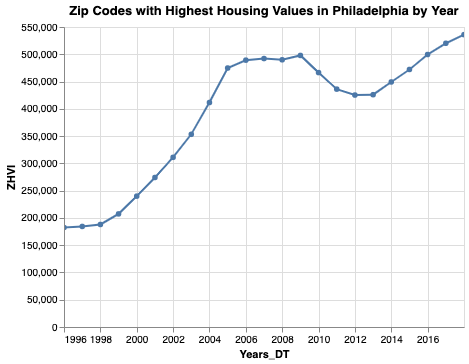

In [23]:
import altair as alt
alt.renderers.enable('notebook')

alt.Chart(data).mark_line(point=True).encode(x='Years_DT:T',y='ZHVI:Q',tooltip='RegionName').properties(title='Zip Codes with Highest Housing Values in Philadelphia by Year').interactive()
